Task no. 0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("SLS22.csv")

# a. Normalize data
# run 1,2
for r in range(1, 2+1):
    run = "run " + str(r)
    df[run] = df[run]/np.max(df[run])
# trick 1-6
for t in range(1, 6+1):
    trick = "trick " + str(t)
    df[trick] = df[trick]/np.max(df[trick])

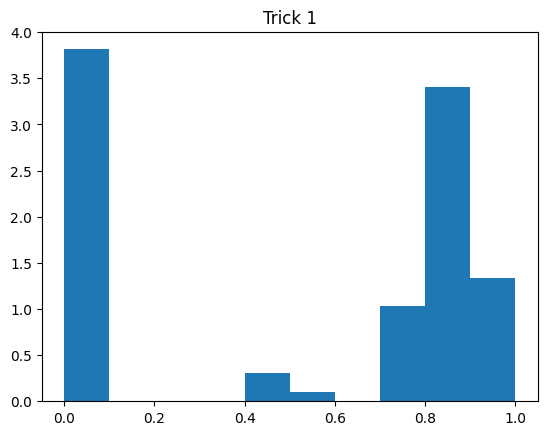

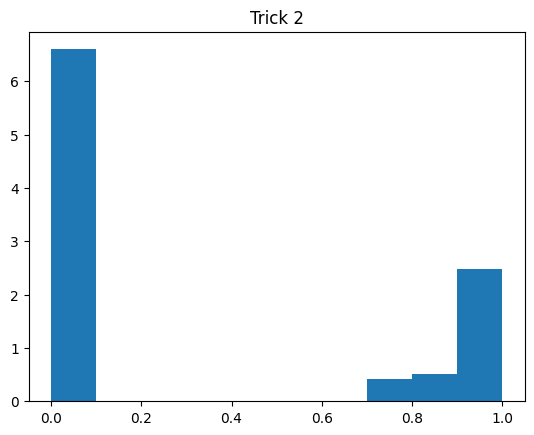

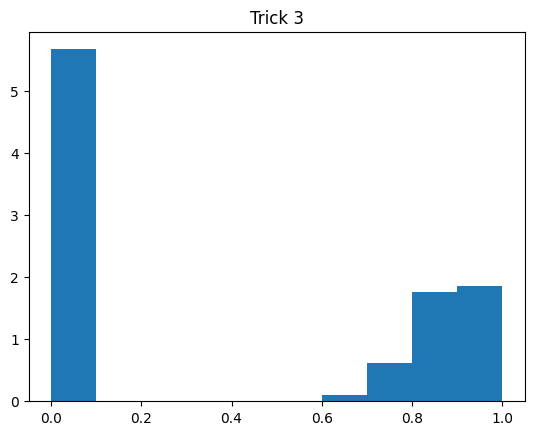

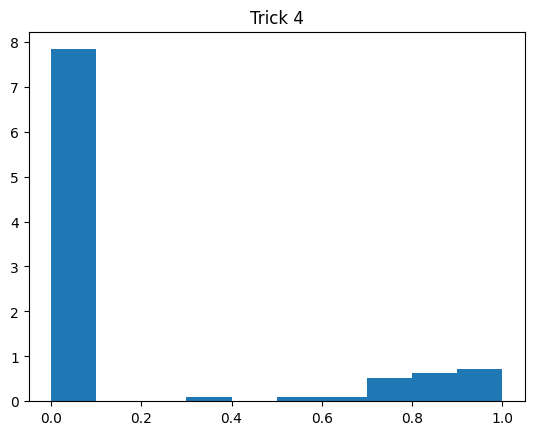

In [2]:
# b. Histograms for tricks 1-4
for t in range(1, 4+1):
    plt.title("Trick " + str(t))
    plt.hist(df["trick " + str(t)], density=True)
    plt.show()

In [3]:
print(df)

           id      location  month  year        comp  heat     run 1  \
0      Berger  jacksonville      7  2022  prelim men     1  0.543478   
1        Papa  jacksonville      7  2022  prelim men     1  0.402174   
2     Pudwill  jacksonville      7  2022  prelim men     1  0.217391   
3      Shirai  jacksonville      7  2022  prelim men     1  0.858696   
4        Mota  jacksonville      7  2022  prelim men     1  0.413043   
..        ...           ...    ...   ...         ...   ...       ...   
92      Hoban     las vegas     10  2022   final men     1  0.673913   
93    Hoefler     las vegas     10  2022   final men     1  0.913043   
94      Eaton     las vegas     10  2022   final men     1  0.750000   
95     Joslin     las vegas     10  2022   final men     1  0.739130   
96  Ribeiro G     las vegas     10  2022   final men     1  0.923913   

       run 2   trick 1   trick 2   trick 3   trick 4   trick 5   trick 6  
0   0.119565  0.729167  0.000000  0.800000  0.000000       N

In [4]:
# c. make i
def f(x):
    if x == 0:
        return 0
    else:
        return 1


for k in range(1, 4+1):
    make = df["trick " + str(k)].apply(f)
    make.name = "make " + str(k)  # Assign the name directly here
    df = pd.concat([df, make], axis=1)  # Use df[cols] to include all columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# d. 
all_skaters = []
for row in range(len(df)):
    if df["id"][row] not in all_skaters:
        all_skaters.append(df["id"][row])
# print(all_skaters)
all_skaters.sort()

prob_list = []
miss_list = []
for skater in all_skaters:
    score = 0
    make_counter = 0
    miss_counter = 0
    total_counter = 0
    for row in range(len(df)):
        if df["id"][row] == skater:
            for trick_no in range(1, 6+1):
                # print(df["trick " + str(trick_no)][row])
                # print(df["trick " + str(trick_no)][row] == 0)
                if pd.notna(df["trick " + str(trick_no)][row]):  # Check if 'id' is not NaN
                    total_counter += 1
                    if df["trick " + str(trick_no)][row] == 0:
                        miss_counter += 1
                    if df["trick " + str(trick_no)][row] > 0:  # screw their "make i"s
                        make_counter += 1
                        if df["trick " + str(trick_no)][row] > .6:
                            score += 1
    try:
        prob_list.append(score/make_counter)
    except ZeroDivisionError:
        prob_list.append(0)
    try:
        miss_list.append(miss_counter/total_counter)
    except ZeroDivisionError:
        miss_list.append(0)

print(all_skaters)
print("average score list")
print(prob_list)
print("probability of miss list")
print(miss_list)

['Berger', 'Decenzo', 'Eaton', 'Foy', 'Fynn', 'Gustavo', 'Hoban', 'Hoefler', 'Horigome', 'Huston', 'Jordan', 'Joslin', 'Majerus', 'McClung', 'Midler', 'Milou', 'Mota', 'Oliveira', 'O’neill', 'Papa', 'Pudwill', 'Ribeiro C', 'Ribeiro G', 'Rodriguez', 'Santiago', 'Shirai', 'Silvas', 'Suciu', 'Wair', 'Wright']
average score list
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333333333333333, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333333333333333, 1.0, 0.9285714285714286, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
probability of miss list
[0.8333333333333334, 0.6111111111111112, 0.375, 0.5, 0.5, 0.6, 0.6363636363636364, 0.6111111111111112, 0.55, 0.625, 0.6, 0.5, 0.625, 0.75, 0.6666666666666666, 0.5416666666666666, 0.75, 0.5833333333333334, 0.75, 0.5625, 0.75, 0.75, 0.5, 0.5, 0.9166666666666666, 0.6363636363636364, 0.625, 0.375, 0.5, 0.75]


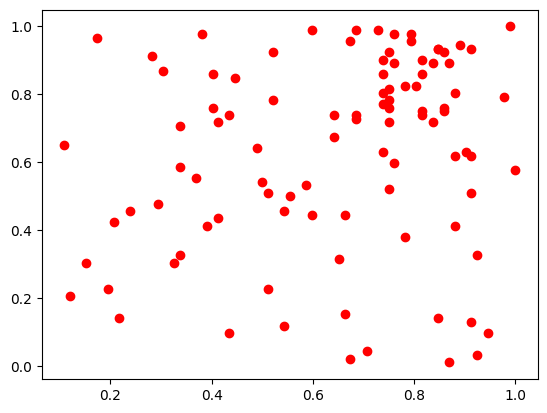

In [6]:
# e. run 1 & run 2 scatter
# spridningsdiagram (scatter diagrams?)
plt.plot(df["run 1"], df["run 2"], 'ro')
plt.show()


Task no. 1

In [7]:
# (a) point estimates for V
# import warnings
# warnings.filterwarnings("ignore", category=UserWarning) #remember indexing

df_alt = df[df.id != "Horigome"]
df_alt = df_alt[df.id != "Joslin"]
df_alt = df_alt[df.id != "Milou"]
df_alt = df_alt[df.id != "Ribeiro G"]

skaters = ["Majerus", "Oliveira", "Decenzo", "Santiago",
           "Papa", "Eaton", "Mota", "Shirai",
           "Jordan", "Hoefler", "Hoban", "Gustavo",
           "Ribeiro C", "O’neill", "Foy", "Midler"]



C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [8]:
print(df_alt)

           id      location  month  year        comp  heat     run 1  \
0      Berger  jacksonville      7  2022  prelim men     1  0.543478   
1        Papa  jacksonville      7  2022  prelim men     1  0.402174   
2     Pudwill  jacksonville      7  2022  prelim men     1  0.217391   
3      Shirai  jacksonville      7  2022  prelim men     1  0.858696   
4        Mota  jacksonville      7  2022  prelim men     1  0.413043   
6     Decenzo  jacksonville      7  2022  prelim men     2  0.500000   
7     Hoefler  jacksonville      7  2022  prelim men     2  0.858696   
8         Foy  jacksonville      7  2022  prelim men     2  0.586957   
9       Hoban  jacksonville      7  2022  prelim men     2  0.380435   
10     Midler  jacksonville      7  2022  prelim men     3  0.880435   
12  Rodriguez  jacksonville      7  2022  prelim men     3  0.760870   
13    O’neill  jacksonville      7  2022  prelim men     3  0.945652   
14   Oliveira  jacksonville      7  2022  prelim men     3  0.91

94       0       1       1       0  


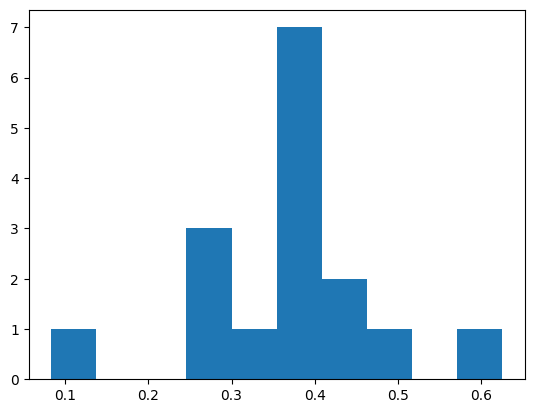

[0.375, 0.41666666666666663, 0.38888888888888884, 0.08333333333333337, 0.4375, 0.625, 0.25, 0.36363636363636365, 0.4, 0.38888888888888884, 0.36363636363636365, 0.4, 0.25, 0.25, 0.5, 0.33333333333333337]


In [9]:
theta_parameters = []
for skater in skaters:
    miss_counter = 0
    total_counter = 0
    for row in range(0, len(df)):
        try:
            if df_alt["id"][row] == skater:
                for trick_no in range(1, 6+1):
                    if pd.notna(df_alt["trick " + str(trick_no)][row]):  # Check if 'id' is not NaN
                        total_counter += 1
                        if df_alt["trick " + str(trick_no)][row] == 0:
                            miss_counter += 1
        except KeyError:
            # print("hi")
            pass
    # print(skater)
    # print(total_counter)
    theta_parameters.append(1 - miss_counter / total_counter)
plt.hist(theta_parameters)
plt.show()
print(theta_parameters)

In [10]:
# (b) point estimates for X
alpha_parameters = []
beta_parameters = []
for skater in skaters:
    Z_outcomes = []
    for row in range(0, len(df)):
        try:
            if df_alt["id"][row] == skater:
                for trick_no in range(1, 6+1):
                    # if pd.notna(df_alt["trick " + str(trick_no)][row]):  # Check if 'id' is not NaN
                    if df_alt["trick " + str(trick_no)][row] > 0:
                        Z_outcomes.append(df_alt["trick " + str(trick_no)][row])
        except KeyError:
            # print("hi")
            pass
    print(skater)
    print(Z_outcomes)
    Z_mean = np.mean(Z_outcomes)
    print(Z_mean)
    Z_usv = np.var(Z_outcomes, ddof=True)   # unbiased sample variance
    print(Z_usv)
    # https://statproofbook.github.io/P/beta-mome.html
    alpha_parameters.append(Z_mean * (Z_mean * (1 - Z_mean) / Z_usv - 1))
    beta_parameters.append((1 - Z_mean) * (Z_mean * (1 - Z_mean) / Z_usv - 1))
# plt.title("my own test")
print("testing")
print(alpha_parameters)
print(beta_parameters)

# Convert lists to numpy arrays
alpha_parameters = np.array(alpha_parameters)
beta_parameters = np.array(beta_parameters)

# Replace NaN values with mean
alpha_parameters_X = np.nan_to_num(alpha_parameters, nan=np.nanmean(alpha_parameters))
beta_parameters_X = np.nan_to_num(beta_parameters, nan=np.nanmean(beta_parameters))

print(alpha_parameters_X)
print(beta_parameters_X)

Majerus
[0.8229166666666667, 0.37894736842105264, 0.4166666666666667]
0.5395102339181287
0.060595090957474104
Oliveira
[0.8421052631578947, 0.863157894736842, 0.8526315789473684, 0.7717391304347826, 0.8736842105263158]
0.8406636155606406
0.0016230618582073534
Decenzo
[0.8125, 0.8958333333333334, 0.8210526315789474, 0.90625, 0.9789473684210527, 0.9347826086956522, 0.7473684210526316]
0.8709620518688025
0.006463643218380125
Santiago
[0.48958333333333337]
0.48958333333333337
nan
Papa
[0.75, 0.8842105263157896, 0.863157894736842, 0.9270833333333334, 0.7604166666666666, 0.6842105263157895, 0.8421052631578947]
0.8158834586466165
0.007451901981745301
Eaton
[0.78125, 0.9130434782608696, 0.8105263157894737, 0.9130434782608696, 0.7894736842105263]
0.8414673913043478
0.004383275598722834
Mota
[0.8125, 0.9456521739130435, 0.7187500000000001]
0.8256340579710145
0.01300052674070572
Shirai
[0.78125, 0.9684210526315788, 1.0, 0.9782608695652175, 0.9789473684210527, 0.9789473684210527, 0.968750000000000

C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\numpy\core\fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
alpha_parameters = []
beta_parameters = []
for skater in skaters:
    Z_outcomes = []
    for row in range(0, len(df)):
        try:
            if df_alt["id"][row] == skater:
                for trick_no in range(1, 6+1):
                    # if pd.notna(df_alt["trick " + str(trick_no)][row]):  # Check if 'id' is not NaN
                    if df_alt["trick " + str(trick_no)][row] > 0:
                        Z_outcomes.append(df_alt["trick " + str(trick_no)][row])
        except KeyError:
            # print("hi")
            pass
    # print(skater)
    # print(Z_outcomes)
    Z_mean = np.mean(Z_outcomes)
    # print(Z_mean)
    Z_usv = np.var(Z_outcomes, ddof=True)   # unbiased sample variance
    # print(Z_usv)
    # https://statproofbook.github.io/P/beta-mome.html
    alpha_parameters.append(Z_mean * (Z_mean * (1 - Z_mean) / Z_usv - 1))
    beta_parameters.append((1 - Z_mean) * (Z_mean * (1 - Z_mean) / Z_usv - 1))
# plt.title("my own test")
print("testing")
print(alpha_parameters)
print(beta_parameters)

# Convert lists to numpy arrays
alpha_parameters = np.array(alpha_parameters)
beta_parameters = np.array(beta_parameters)

# Replace NaN values with mean
alpha_parameters_X = np.nan_to_num(alpha_parameters, nan=np.nanmean(alpha_parameters))
beta_parameters_X = np.nan_to_num(beta_parameters, nan=np.nanmean(beta_parameters))

print(alpha_parameters_X)
print(beta_parameters_X)

testing
[1.6724734314194132, 68.53775377212024, 14.27296603174554, nan, 15.630936215674899, 24.76763814399931, 8.317096283255015, 8.46272694727672, 13.394333297658735, 27.117856365828086, 26.38810741671482, 56.98665428817877, 110.67152031063318, 385.24332979359167, 19.6564649834596, 33.26030400219357]
[1.427511195884641, 12.99040148937784, 2.1146205469353307, nan, 3.527359065373475, 4.666227505395984, 1.7564904383177071, 0.45789641364936695, 1.3762382902192216, 6.109517216855211, 1.9710354652113937, 10.676570420521331, 26.12417861409796, 51.74910400212416, 2.1421942300626418, 5.681685677178277]
[  1.67247343  68.53775377  14.27296603  54.29201075  15.63093622
  24.76763814   8.31709628   8.46272695  13.3943333   27.11785637
  26.38810742  56.98665429 110.67152031 385.24332979  19.65646498
  33.260304  ]
[ 1.4275112  12.99040149  2.11462055  8.85140204  3.52735907  4.66622751
  1.75649044  0.45789641  1.37623829  6.10951722  1.97103547 10.67657042
 26.12417861 51.749104    2.14219423  5

In [12]:
# (c) Point estimates for Y for which I chose the Beta distribution
# Run model
alpha_parameters = []
beta_parameters = []
for skater in skaters:
    Z_outcomes = []
    for row in range(0, len(df)):
        try:
            if df_alt["id"][row] == skater:
                for run_no in range(1, 2+1):
                    # if pd.notna(df_alt["trick " + str(trick_no)][row]):  # Check if 'id' is not NaN
                    Z_outcomes.append(df_alt["run " + str(run_no)][row])
        except KeyError:
            # print("hi")
            pass
    # print(skater)
    # print(Z_outcomes)
    Z_mean = np.mean(Z_outcomes)
    # print(Z_mean)
    Z_usv = np.var(Z_outcomes, ddof=True)   # unbiased sample variance
    # print(Z_usv)
    # https://statproofbook.github.io/P/beta-mome.html
    alpha_parameters.append(Z_mean * (Z_mean * (1 - Z_mean) / Z_usv - 1))
    beta_parameters.append((1 - Z_mean) * (Z_mean * (1 - Z_mean) / Z_usv - 1))
# plt.title("my own test")
print("testing")
print(alpha_parameters)
print(beta_parameters)

# Convert lists to numpy arrays
alpha_parameters_Y = np.array(alpha_parameters)
beta_parameters_Y = np.array(beta_parameters)

print(alpha_parameters_Y)
print(beta_parameters_Y)

# plt.plot(alpha_parameters_Y, beta_parameters_Y, 'ro')
# plt.show()

testing
[1.076159391023389, 3.7700265849073964, 2.9858013485477173, 2.0000397196890587, 1.571804361561061, 58.31861413043472, 2.9700876848946653, 1.218291764710187, 2.1070919225576947, 1.06675847887896, 2.572100810457778, 0.7913610428820687, 1.1584430211926586, 0.32314254697400047, 2.5584806359509584, 0.7031831118511126]
[1.3095433553417142, 2.2971882106287045, 1.6308998962655592, 2.821016722530854, 1.2566748807590875, 14.431385869565196, 2.8437009748991486, 0.5750337129432079, 0.49146648059656656, 0.45481950649878106, 1.1602852236449912, 0.4447207218912813, 0.8091278948022567, 0.3375044379506228, 2.540007851575861, 0.3544656013418414]
[ 1.07615939  3.77002658  2.98580135  2.00003972  1.57180436 58.31861413
  2.97008768  1.21829176  2.10709192  1.06675848  2.57210081  0.79136104
  1.15844302  0.32314255  2.55848064  0.70318311]
[ 1.30954336  2.29718821  1.6308999   2.82101672  1.25667488 14.43138587
  2.84370097  0.57503371  0.49146648  0.45481951  1.16028522  0.44472072
  0.80912789  

In [13]:
from scipy import stats

# (d) lastly: simulate 5000 cups
# for loop
all_winners = []

for cup in range(5000):
    # 2 runs for each skater
    # 4 tricks for eachs skater
    # calculate scores
    # Set W = [W1, W2, W3, W4], W for Winners
    grades_list = []
    for skater_no in range(len(skaters)):
        run_list = stats.beta.rvs(a=alpha_parameters_Y[skater_no], b=beta_parameters_Y[skater_no], size=2)
        # print(run_list)
        r1 = run_list[0] 
        r2 = run_list[1]
        trick_list = stats.beta.rvs(a=alpha_parameters_Y[skater_no], b=beta_parameters_Y[skater_no], size=4)
        make_list = stats.bernoulli.rvs(p=theta_parameters[skater_no], size=4)
        # remove the tricks they didn't make
        made_trick_list = []
        for t in range(4):
            if make_list[t]:
                made_trick_list.append(trick_list[t])
            else:
                made_trick_list.append(0) # I could just leave it blanc, but this is easier when calculating grades later
        # print(made_trick_list)

        # calculate grades
        # sort, and pop from trick list
        made_trick_list.sort()
        top_trick = made_trick_list.pop()
        next_top_trick = made_trick_list.pop()    

        grade = max(run_list) + top_trick + next_top_trick
        grades_list.append(grade)

    # print(grades_list)

    # Extract indices of top four grades
    top_four_indices = np.argsort(grades_list)[::-1][:4]

    # The top four grades (whoo)
    top_four_grades = [grades_list[i] for i in top_four_indices]

    #print("Top four grades:", top_four_grades)
    #print("Indices of top four grades:", top_four_indices)
    #print("corresponding skaters are:")
    # cup_winnders = []
    for k in range(4):
        all_winners.append(skaters[top_four_indices[k]])
        # print(skaters[top_four_indices[k]])
    # for refference: skaters = ["Majerus", "Oliveira", "Decenzo", "Santiago",
                     # "Papa", "Eaton", "Mota", "Shirai",
                     # "Jordan", "Hoefler", "Hoban", "Gustavo",
                     # "Ribeiro C", "O’neill", "Foy", "Midler"]


from collections import Counter
                
# Find average winners (doesn't really matter if they're 1st or 4th)
skater_counts = Counter(all_winners)
print(skater_counts)

# Get the top four skaters and their counts
top_four_skaters = skater_counts.most_common(4)
print(top_four_skaters)

# Print the top four skaters
print("Top four skaters:")
for skater, count in top_four_skaters:
    print(f"{skater}: {count} wins")

Counter({'Eaton': 4056, 'Jordan': 2596, 'Hoefler': 1942, 'Gustavo': 1636, 'Shirai': 1587, 'Hoban': 1467, 'Midler': 1403, 'Decenzo': 1291, 'Oliveira': 1055, 'Papa': 968, 'Ribeiro C': 531, 'Foy': 496, 'O’neill': 457, 'Majerus': 353, 'Mota': 156, 'Santiago': 6})
[('Eaton', 4056), ('Jordan', 2596), ('Hoefler', 1942), ('Gustavo', 1636)]
Top four skaters:
Eaton: 4056 wins
Jordan: 2596 wins
Hoefler: 1942 wins
Gustavo: 1636 wins


Task no.3

We'll try the prior used in example 10.8, and 3D MCMC

Majerus
Samples: 5000
Trick beta model
mean alpha: 2.3090576564890544 mean beta: 2.010906419462488 mean theta: 0.8038245740129548
var alpha: 0.9986289002202028 var beta: 0.7798261503056434 var theta: 0.025511321750426297


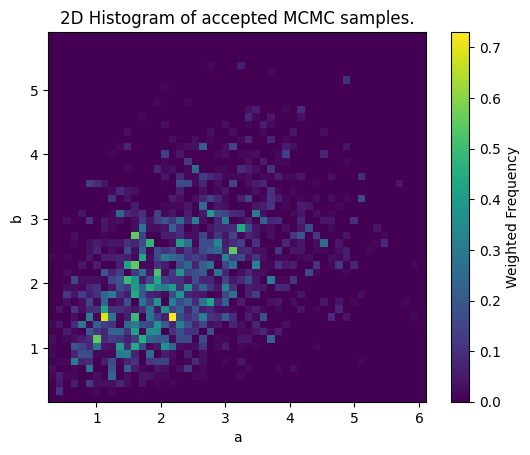

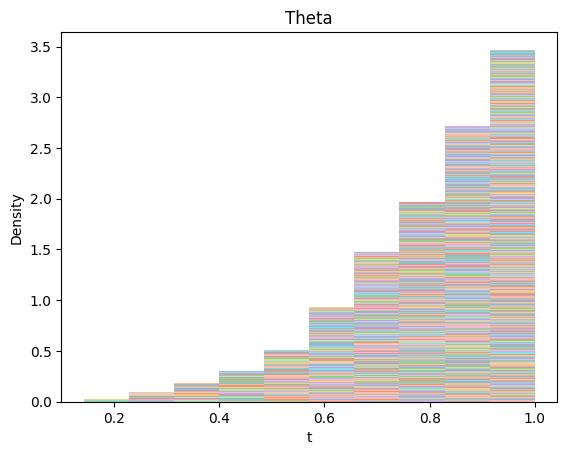

Oliveira
Samples: 5000
Trick beta model
mean alpha: 3.464349468797981 mean beta: 1.0765923299844788 mean theta: 0.8511127791714791
var alpha: 1.4367828545912096 var beta: 0.16626088758080662 var theta: 0.01747261137728793


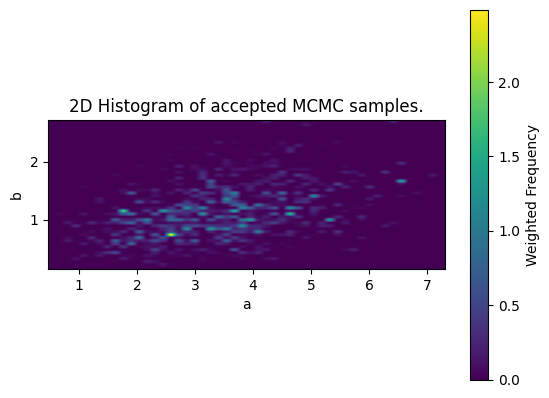

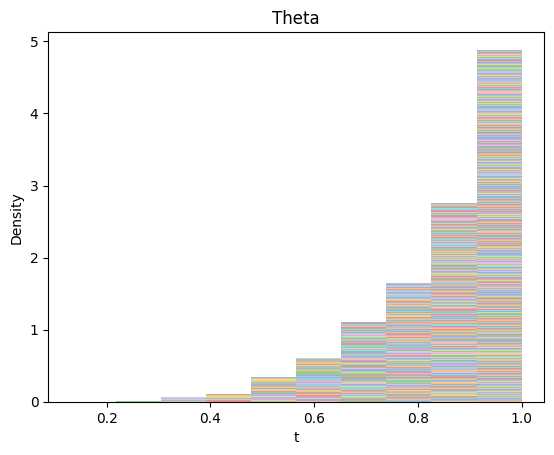

Decenzo
Samples: 5000
Trick beta model
mean alpha: 3.285053535949155 mean beta: 0.8012427516099502 mean theta: 0.8906499503565181
var alpha: 1.1443624738720648 var beta: 0.06394675239235446 var theta: 0.01198181988122559


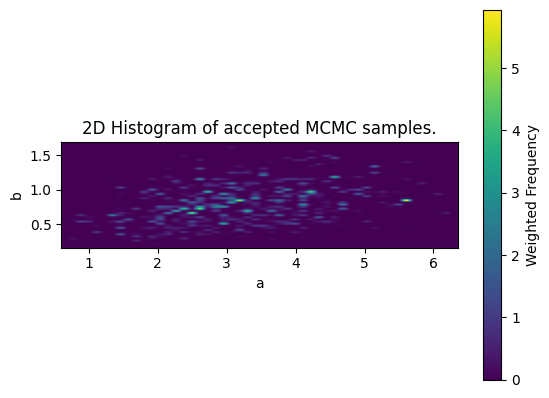

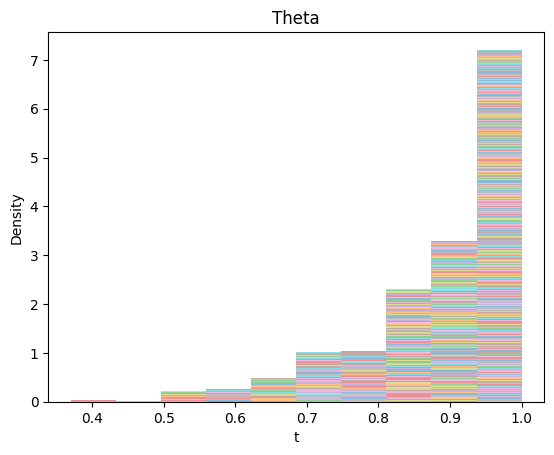

Santiago
Samples: 5000
Trick beta model
mean alpha: 4.149880773543146 mean beta: 4.397288434893091 mean theta: 0.6570150559921143
var alpha: 4.992360928106845 var beta: 5.684569922644094 var theta: 0.05502320458461409


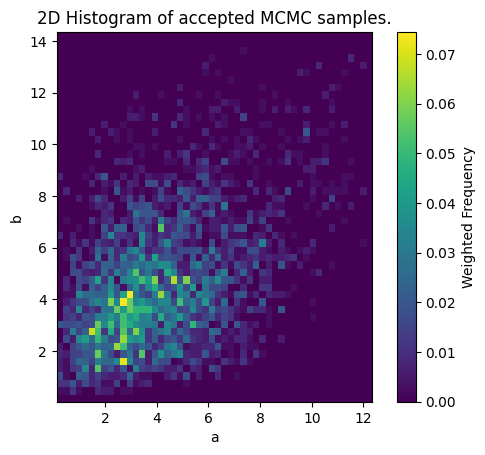

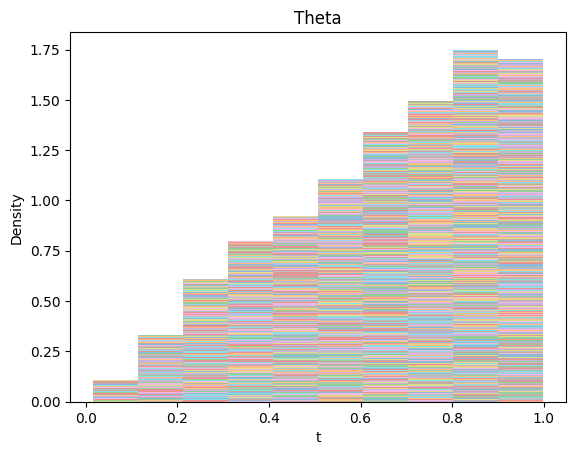

Papa
Samples: 5000
Trick beta model
mean alpha: 3.039231230372408 mean beta: 0.9987398211169755 mean theta: 0.8826471409977811
var alpha: 1.0578269882646538 var beta: 0.11636289521599787 var theta: 0.011500638321207906


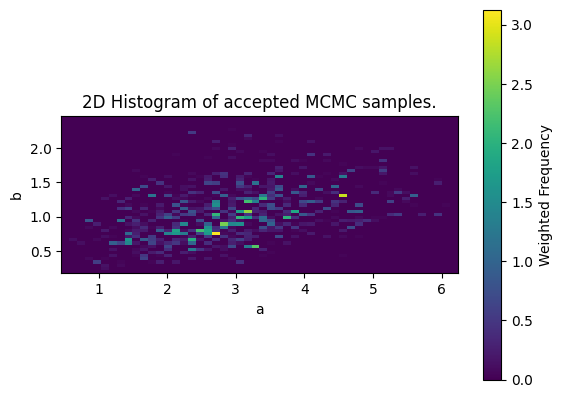

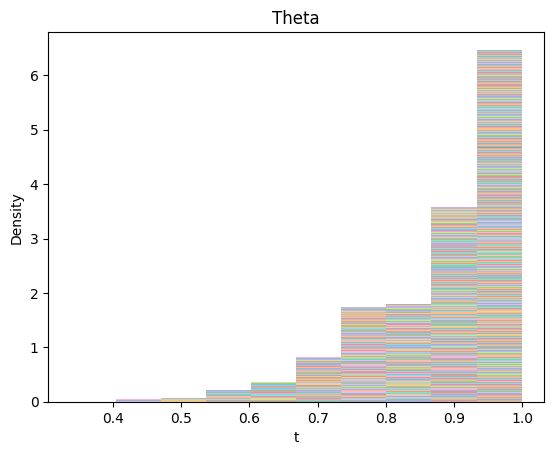

Eaton
Samples: 5000
Trick beta model
mean alpha: 3.39121030059586 mean beta: 1.008994991399228 mean theta: 0.850296928819198
var alpha: 1.5337197913660958 var beta: 0.15910927642904446 var theta: 0.01731781507161465


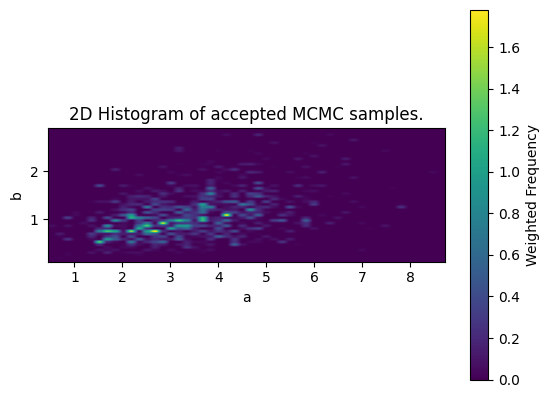

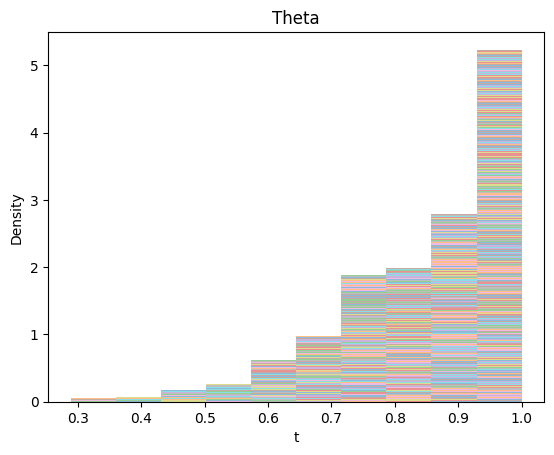

Mota
Samples: 5000
Trick beta model
mean alpha: 3.552910130109021 mean beta: 1.1079454215980462 mean theta: 0.799934785853367
var alpha: 2.321180995525941 var beta: 0.2433835028373655 var theta: 0.028255710339157334


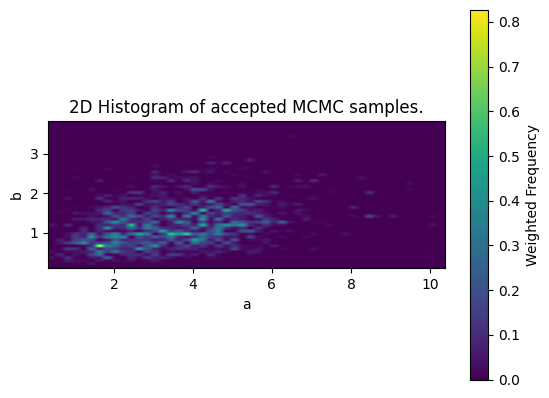

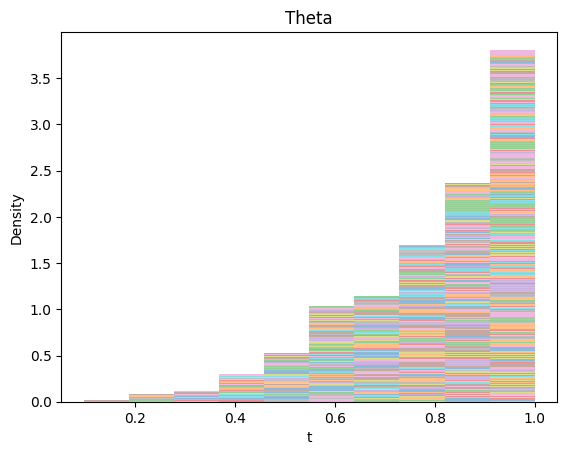

C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:91: RuntimeWarning: divide by zero encountered in power
C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in multiply
C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in true_divide


Shirai
Samples: 5000
Trick beta model
mean alpha: 1.6398293803614339 mean beta: 1.5710211128256457 mean theta: 0.7621755757791958
var alpha: 1.972546772407011e-31 var beta: 0.0 var theta: 1.2328417327543818e-32


C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\numpy\lib\histograms.py:1124: RuntimeWarning: invalid value encountered in true_divide
  hist /= s


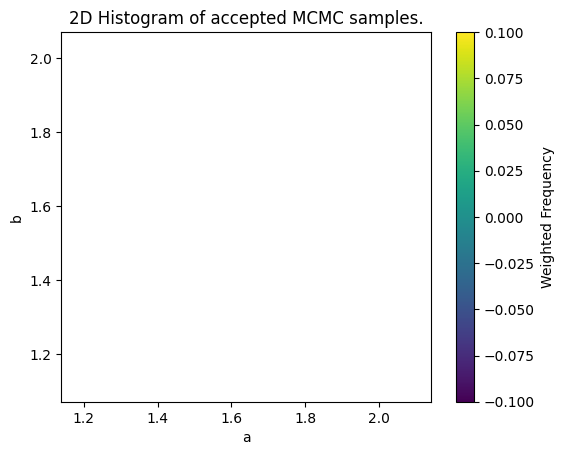

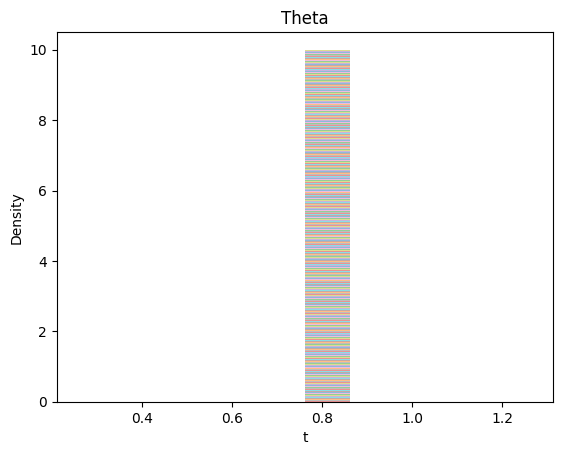

Jordan
Samples: 5000
Trick beta model
mean alpha: 3.1472803168770778 mean beta: 0.6774348914665199 mean theta: 0.9072250853995656
var alpha: 1.0335671742645236 var beta: 0.048493129079449845 var theta: 0.008734651056886521


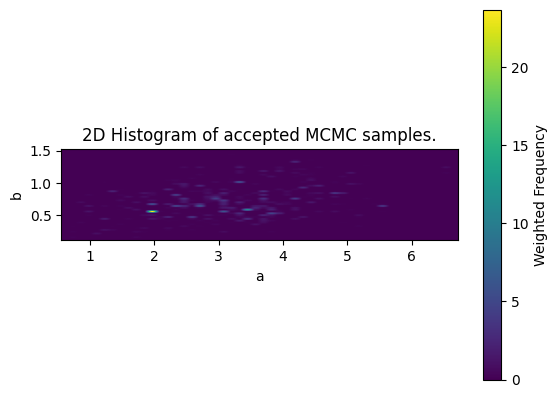

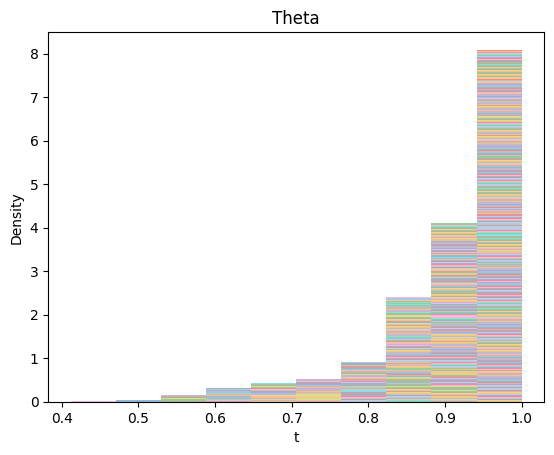

Hoefler
Samples: 5000
Trick beta model
mean alpha: 3.07592257721147 mean beta: 1.0427607682278508 mean theta: 0.8804927153957962
var alpha: 0.8982275656014802 var beta: 0.11475054863493406 var theta: 0.009770910236143272


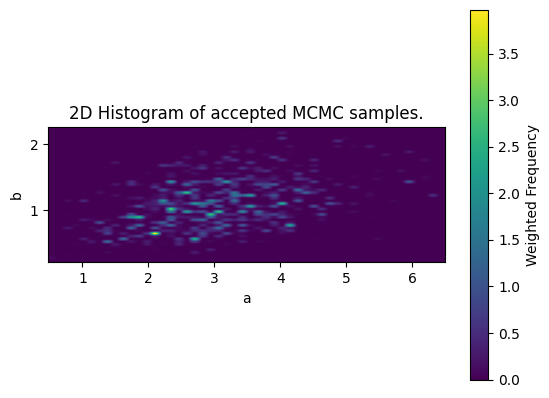

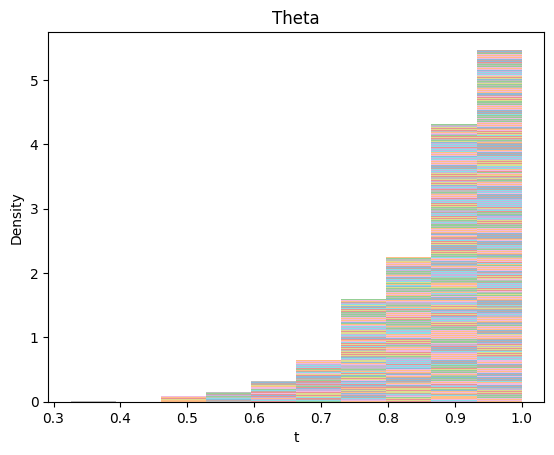

Hoban
Samples: 5000
Trick beta model
mean alpha: 1.7303736989134908 mean beta: 1.1773693532770715 mean theta: 0.6882291521884799
var alpha: 1.972546772407011e-31 var beta: 4.931366931017527e-32 var theta: 1.2328417327543818e-32


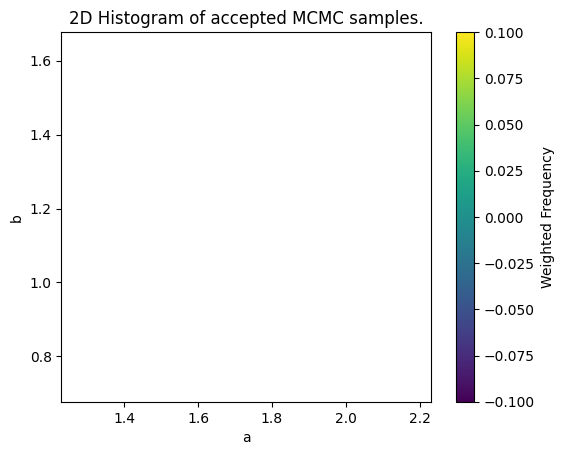

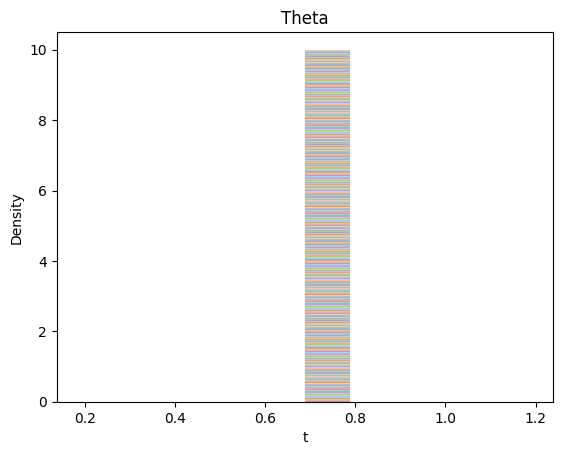

Gustavo
Samples: 5000
Trick beta model
mean alpha: 3.0265211976766464 mean beta: 0.949079047449654 mean theta: 0.9052778394294464
var alpha: 0.8343478298054111 var beta: 0.08811085616995644 var theta: 0.006537030224647


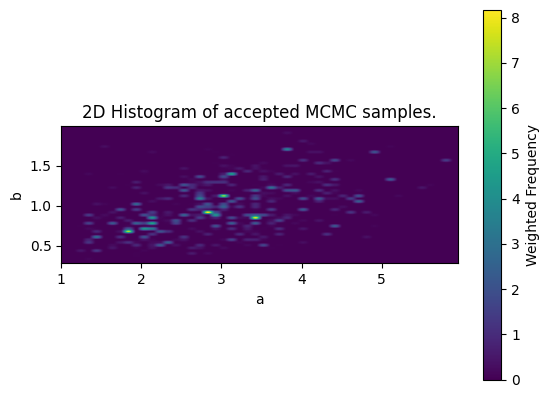

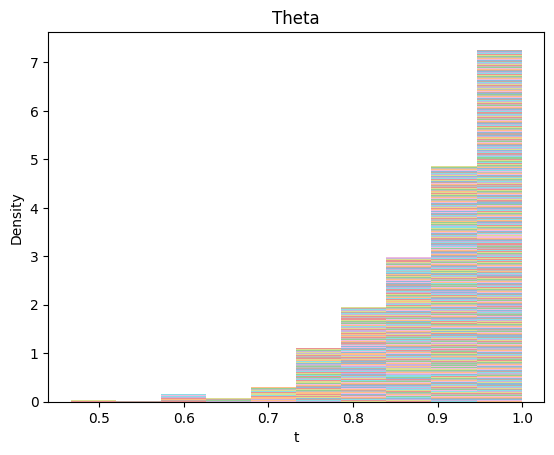

Ribeiro C
Samples: 5000
Trick beta model
mean alpha: 3.563201044027241 mean beta: 1.3230077362880144 mean theta: 0.8056727530676057
var alpha: 2.0733476436290252 var beta: 0.3213331383752071 var theta: 0.02798273875306484


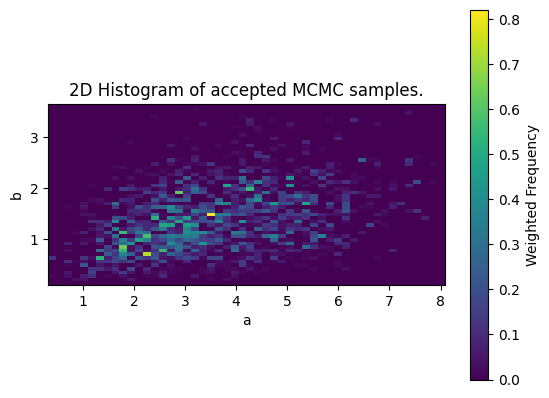

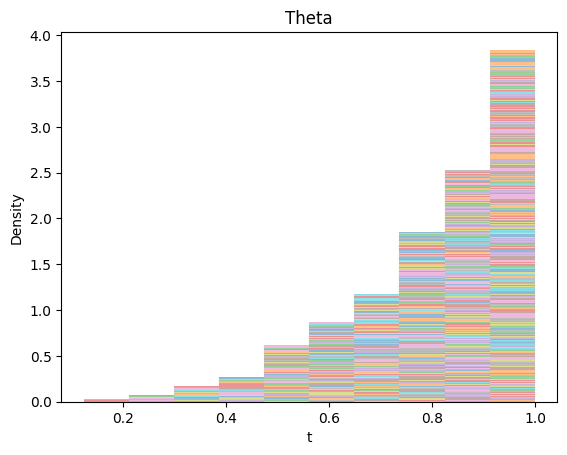

O’neill
Samples: 5000
Trick beta model
mean alpha: 4.047324509036301 mean beta: 1.0589636390323662 mean theta: 0.7969920773576138
var alpha: 3.3920866493693476 var beta: 0.24527749447131691 var theta: 0.0252713109883153


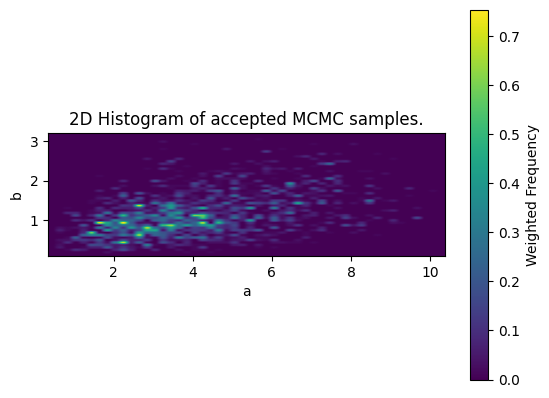

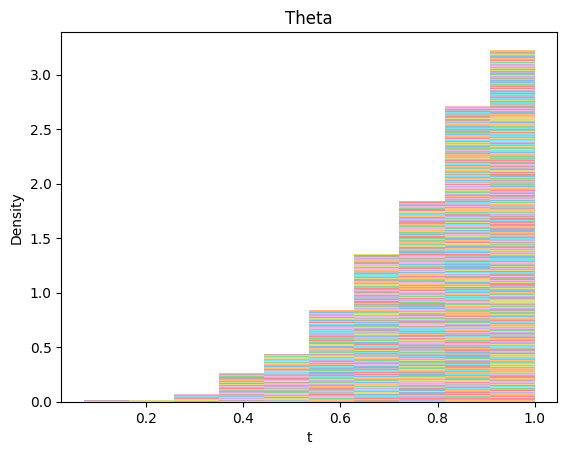

Foy
Samples: 5000
Trick beta model
mean alpha: 3.555296579731899 mean beta: 0.745030523668565 mean theta: 0.881098567156028
var alpha: 1.3524596696521434 var beta: 0.06663939716269338 var theta: 0.011996961999664482


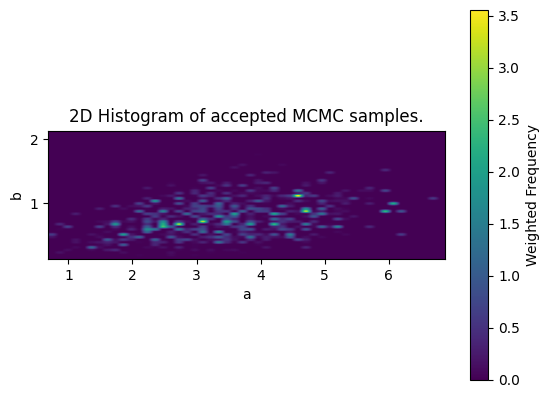

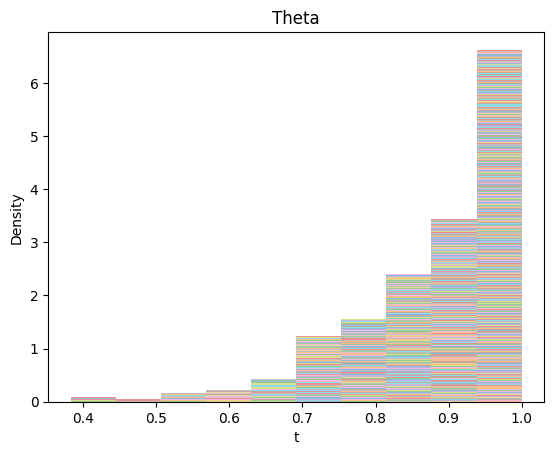

Midler
Samples: 5000
Trick beta model
mean alpha: 3.505577010280997 mean beta: 1.0383517697633369 mean theta: 0.8225360963537068
var alpha: 2.1088398963720993 var beta: 0.18106980023966474 var theta: 0.020646311290395625


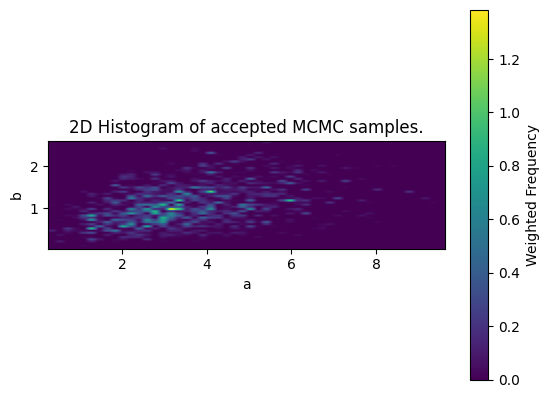

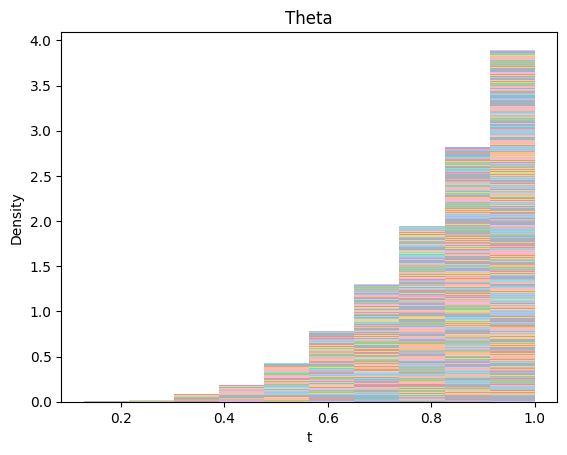

In [14]:
from scipy.special import gamma
import numpy as np
from scipy.special import beta
from scipy import stats
import matplotlib.pyplot as plt

alpha_parameters_X = []
beta_parameters_X = []
theta_parameters = []
# alpha_parameters_Y = []
# beta_parameters_Y = []

for skater in skaters:
    # tricks
    X_outcomes = []
    for row in range(0, len(df)):
        try:
            if df_alt["id"][row] == skater:
                for trick_no in range(1, 6+1):
                    # if pd.notna(df_alt["trick " + str(trick_no)][row]):  # Check if 'id' is not NaN
                    if df_alt["trick " + str(trick_no)][row] > 0:
                        X_outcomes.append(df_alt["trick " + str(trick_no)][row])
        except KeyError:
            # print("hi")
            pass
    X_outcomes = np.array(X_outcomes)
    
    # tried combinations:
    # la th judgement
    # .5 .5 no
    # .5 1 no
    # .5 1.5

    # .5 5 decenter
    
    # .5 7 decent
    
    # 1 .5 (long time to generate)
    # 1 1 no
    # 1 1.5 no
    

    
    # 1 3.5 ok-ish
    # 1 4 decent
    # 1 5 decenter
    # 1 6 decent
    # 1 7 decent
    
    # 1.5 .5 (Long time to generate)
    # 1.5 1 (LTTG)
    # 1.5 1.5 no
    # 2 .5 lltg
    # 2 1 lltg
    # 2 1.5 no
    # 2 2 no
    
    # 2 5 decent-less
    
    # 2 7 decent
    
    # ...
    # 3 .5 no
    # 3 1 lltg
    # 3 1.5 no
    # 3 2 lltg
    # 3 2.5 no
    # 3 3 no
    
    # 4 1 lltg
    
    # 4 2 lltg
    # 4 2.5 no
    # 4 3 no
    # 4 3.5 no
    # 4 4 no
    #
    
    # ...
    # 5 5 lttg
    
    la = .5
    th = 4
    def likelihood(x, a, b, t):
        Dist = 1
        for x_el in x:
            if x_el == 0:
                Dist *= (1-t)
            elif x_el != 0:
                Dist *= t * x_el**(a-1) * (1-x_el)**(b-1) / beta(a, b) * la**th / gamma(th) * (a + b + 1) ** (th-1) \
                       * np.exp(-la*(a + b + 1)) * (a + b)**(-1) * x_el **.5 *(1-x_el)**.5 / beta(.5,.5)
                # weakly informative prior for t, Beta(.5,.5)
        return Dist

    
    # Sample values by MCMC
    a0 = stats.uniform.rvs(loc=1, size=1)
    b0 = stats.uniform.rvs(loc=1, size=1)
    t0 = stats.uniform.rvs(loc=0, size=1)
    n = 10000
    samples = [[a0, b0, t0]]
    for iteration in range(n-1):
        a_guess = stats.norm.rvs(loc=samples[-1][0], scale=1, size=1)
        b_guess = stats.norm.rvs(loc=samples[-1][1], scale=1, size=1)
        t_guess = stats.norm.rvs(loc=samples[-1][2], scale=1, size=1)
        # Reject proposed samples if t is out of bounds
        while a_guess < 0 or b_guess < 0 or t_guess <= 0 or t_guess >= 1:
            a_guess = stats.norm.rvs(loc=samples[-1][0], scale=1, size=1)
            b_guess = stats.norm.rvs(loc=samples[-1][1], scale=1, size=1)
            t_guess = stats.norm.rvs(loc=samples[-1][2], scale=1, size=1)
        R = likelihood(X_outcomes, a_guess, b_guess, t_guess) / likelihood(X_outcomes, samples[-1][0], samples[-1][1], samples[-1][2])
        u = stats.uniform.rvs(size=1)
        if u < min(R, 1):
            samples.append([a_guess, b_guess, t_guess])
        else:
            samples.append([samples[-1][0], samples[-1][1], samples[-1][2]])
            
    samples = samples[-5000:] # remove burn-in
    alpha_list = []
    beta_list = []
    theta_list = []
    for sample in samples:
        alpha_list.append(sample[0])
        beta_list.append(sample[1])
        theta_list.append(sample[2])

    print(skater)
    print("Samples:", len(samples))
        
    print("Trick beta model")
    print("mean alpha:", np.mean(alpha_list), "mean beta:", np.mean(beta_list), "mean theta:", np.mean(theta_list))
    alpha_parameters_X.append(np.mean(alpha_list))
    beta_parameters_X.append(np.mean(beta_list))
    print("var alpha:", np.var(alpha_list, ddof=1), "var beta:", np.var(beta_list, ddof=1), "var theta:", np.var(theta_list, ddof=1))
    
    plt.figure(1)
    # Histogram part(y)
    a_vals = np.linspace(min(alpha_list), max(alpha_list), 50)
    b_vals = np.linspace(min(beta_list), max(beta_list), 50)

    A, B = np.meshgrid(a_vals, b_vals)

    b_vals = b_vals[::-1]

    Z = np.zeros_like(A)
    for sample in samples:
        for i in range(A.shape[0]-1):
            for j in range(A.shape[1]-1):
                if a_vals[i] < sample[0] <= a_vals[i+1] and b_vals[j] > sample[1] >= b_vals[j + 1]:
                        Z[i, j] += 1
    # Create a 2D histogram with weights from Z
    hist, xedges, yedges = np.histogram2d(A.flatten(), B.flatten(), bins=(50, 50), weights=Z.flatten(), density=True)
    # Plot the histogram
    plt.imshow(hist, cmap='viridis', extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()])
    plt.colorbar(label='Weighted Frequency')
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title('2D Histogram of accepted MCMC samples.')
    plt.show()

    
    plt.figure(2)
    plt.title("Theta")
    plt.hist(theta_list, stacked=True, density=True, alpha=0.5)
    plt.xlabel('t')
    plt.ylabel('Density')
    plt.show()

NOTES!
















Since we have no prior information about neither theta nor alpha nor beta, I've chosen non-infomative priors for all. Specifically, the Jeffrey's prior for theta (since theta is bounded on the interval of 0 to 1, and the beta(.5,.5) gives equal probability for each value on the interval of zero to one), and a constant likelihood for all positive valies for alpha and beta. These are not normalizable in and of themselves, but when calculating the posterior distributions they have no impact.

In [15]:
#import numpy as np
#import time
#from scipy.special import beta
#from scipy import stats
#from scipy.stats import beta as beta_dist
#import matplotlib.pyplot as plt


#alpha_parameters_X = []
#beta_parameters_X = []
#theta_parameters = []
#alpha_parameters_Y = []
#beta_parameters_Y = []


#for skater in skaters:
#    # tricks
#    X_outcomes = []
#    for row in range(0, len(df)):
#        try:
#            if df_alt["id"][row] == skater:
#                for trick_no in range(1, 6+1):
#                    # if pd.notna(df_alt["trick " + str(trick_no)][row]):  # Check if 'id' is not NaN
#                    if df_alt["trick " + str(trick_no)][row] > 0:
#                        X_outcomes.append(df_alt["trick " + str(trick_no)][row])
#        except KeyError:
#            # print("hi")
#            pass
#    X_outcomes = np.array(X_outcomes)
#        
#    def likelihood(y, a, b):
#        return np.prod(y**(a-1) * (1-y)**(b-1) / beta(a, b))
#
#
#    # Sample values by MCMC
#    a0 = stats.uniform.rvs(loc=1, size=1)
#    b0 = stats.uniform.rvs(loc=1, size=1)
#    n = 5000
#    samples = [[a0, b0]]
#    for iteration in range(n-1):
#        a_guess = stats.norm.rvs(loc=samples[-1][0], scale=1, size=1)
#        b_guess = stats.norm.rvs(loc=samples[-1][1], scale=1, size=1)
#        # Reject proposed samples if t is out of bounds
#        while a_guess < 0 or b_guess < 0:
#            a_guess = stats.norm.rvs(loc=samples[-1][0], scale=1, size=1)
#            b_guess = stats.norm.rvs(loc=samples[-1][1], scale=1, size=1)
#        R = likelihood(X_outcomes, a_guess, b_guess) / likelihood(X_outcomes, samples[-1][0], samples[-1][1])
#        u = stats.uniform.rvs(size=1)
#        if u < min(R, 1):
#            samples.append([a_guess, b_guess])
#        else:
#            samples.append([samples[-1][0], samples[-1][1]])
#            
#    alpha_list = []
#    beta_list = []
#    for sample in samples:
#        alpha_list.append(sample[0])
#        beta_list.append(sample[1])
#
#    print(skater)
#    print("Samples:", len(samples))
#        
#    print("Trick beta model")
#    print("mean alpha:", np.mean(alpha_list), "mean beta:", np.mean(beta_list))
#    alpha_parameters_X.append(np.mean(alpha_list))
#    beta_parameters_X.append(np.mean(beta_list))
#    print("var alpha:", np.var(alpha_list, ddof=1), "var beta:", np.var(beta_list, ddof=1))
#    plt.figure(1)
#    # Histogram part(y)
#    a_vals = np.linspace(min(alpha_list), max(alpha_list), 50)
#    b_vals = np.linspace(min(beta_list), max(beta_list), 50)
#
#    A, B = np.meshgrid(a_vals, b_vals)
#
#    b_vals = b_vals[::-1]
#
#    Z = np.zeros_like(A)
#    for sample in samples:
#        for i in range(A.shape[0]-1):
#            for j in range(A.shape[1]-1):
#                if a_vals[i] < sample[0] <= a_vals[i+1] and b_vals[j] > sample[1] >= b_vals[j + 1]:
#                        Z[i, j] += 1
#    # Create a 2D histogram with weights from Z
#    hist, xedges, yedges = np.histogram2d(A.flatten(), B.flatten(), bins=(50, 50), weights=Z.flatten(), density=True)
#    # Plot the histogram
#    plt.imshow(hist, cmap='viridis', extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()])
#    plt.colorbar(label='Weighted Frequency')
#    plt.xlabel('a')
#    plt.ylabel('b')
#    plt.title('2D Histogram of accepted MCMC samples.')
#    plt.show()
#
#
#    def likelihood(x, t):
#        v = 0
#        for x_el in x:
#            if x_el != 0:
#                v += 1
#        return t ** v * (1 - t) ** (len(x) - v)
#
#
#    # Markov Chain Monte Carlo (MCMC)
#    t0 = stats.uniform.rvs(size=1)
#    n = 5000
#    samples = [t0]
#    # Decenzo's my man
#    for i in range(n-1):
#        t_guess = stats.norm.rvs(loc=samples[-1], scale=1, size=1)
#
#        # Reject proposed samples if t is out of bounds
#        while t_guess < 0 or t_guess > 1:
#            # for techical reasons t cannot be allowed to be 0 or 1,
#            # it would result in division by zero in for example 0^(-1)
#            # ... maybe it's a non-issue, as the random variable 
#            # generated would never be exactly 0 or 1...
#            t_guess = stats.norm.rvs(loc=samples[-1], scale=1, size=1)
#
#        R = likelihood(X_outcomes, t_guess) / likelihood(X_outcomes, samples[-1])
#        u = stats.uniform.rvs(size=1)
#        if u < min(R, 1):
#            samples.append(t_guess)
#        else:
#            samples.append(samples[-1])
#
#    print("Make bernoulli model")
#    print("mean theta:", np.mean(samples))
#    theta_parameters.append(np.mean(samples))
#    print("var theta:", np.var(samples, ddof=1))
#    
#    plt.figure(2)
#    plt.title("Theta")
#    plt.hist(samples, stacked=True, density=True, alpha=0.5)
#    plt.xlabel('t')
#    plt.ylabel('Density')
#    plt.show()
#    
#    # runs
#    Y_outcomes = []
#    for row in range(0, len(df)):
#        try:
#            if df_alt["id"][row] == skater:
#                for run_no in range(1, 2+1):
#                    # if pd.notna(df_alt["trick " + str(trick_no)][row]):  # Check if 'id' is not NaN
#                    if df_alt["run " + str(trick_no)][row] > 0:
#                        Y_outcomes.append(df_alt["trick " + str(trick_no)][row])
#        except KeyError:
#            # print("hi")
#            pass
#    Y_outcomes = np.array(X_outcomes)
#    
#            
#    def likelihood(y, a, b):
#        return np.prod(y**(a-1) * (1-y)**(b-1) / beta(a, b))
#    
#    # Sample values by MCMC
#    a0 = stats.uniform.rvs(loc=1, size=1)
#    b0 = stats.uniform.rvs(loc=1, size=1)
#    n = 5000
#    samples = [[a0, b0]]
#    for iteration in range(n-1):
#        a_guess = stats.norm.rvs(loc=samples[-1][0], scale=1, size=1)
#        b_guess = stats.norm.rvs(loc=samples[-1][1], scale=1, size=1)
#        # Reject proposed samples if t is out of bounds
#        while a_guess < 0 or b_guess < 0:
#            a_guess = stats.norm.rvs(loc=samples[-1][0], scale=1, size=1)
#            b_guess = stats.norm.rvs(loc=samples[-1][1], scale=1, size=1)
#        R = likelihood(Y_outcomes, a_guess, b_guess) / likelihood(Y_outcomes, samples[-1][0], samples[-1][1])
#        u = stats.uniform.rvs(size=1)
#        if u < min(R, 1):
#            samples.append([a_guess, b_guess])
#        else:
#            samples.append([samples[-1][0], samples[-1][1]])
#            
#    alpha_list = []
#    beta_list = []
#    for sample in samples:
#        alpha_list.append(sample[0])
#        beta_list.append(sample[1])
#        
#    print("Run beta model")
#    print("mean alpha:", np.mean(alpha_list), "mean beta:", np.mean(beta_list))
#    alpha_parameters_Y.append(np.mean(alpha_list))
#    beta_parameters_Y.append(np.mean(beta_list))
#    print("var alpha:", np.var(alpha_list, ddof=1), "var beta:", np.var(beta_list, ddof=1))
#    
#    plt.figure(3)
#    # Histogram part(y)
#    a_vals = np.linspace(min(alpha_list), max(alpha_list), 50)
#    b_vals = np.linspace(min(beta_list), max(beta_list), 50)
#
#    A, B = np.meshgrid(a_vals, b_vals)
#
#    b_vals = b_vals[::-1]
#
#    Z = np.zeros_like(A)
#    for sample in samples:
#        for i in range(A.shape[0]-1):
#            for j in range(A.shape[1]-1):
#                if a_vals[i] < sample[0] <= a_vals[i+1] and b_vals[j] > sample[1] >= b_vals[j + 1]:
#                        Z[i, j] += 1
#    # Create a 2D histogram with weights from Z
#    hist, xedges, yedges = np.histogram2d(A.flatten(), B.flatten(), bins=(50, 50), weights=Z.flatten(), density=True)
#    # Plot the histogram
#    plt.imshow(hist, cmap='viridis', extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()])
#    plt.colorbar(label='Weighted Frequency')
#    plt.xlabel('a')
#    plt.ylabel('b')
#    plt.title('2D Histogram of accepted MCMC samples.')
#    plt.show()
#

In [16]:
from scipy import stats

# (d) lastly: simulate 5000 cups
# for loop
all_winners = []

for cup in range(5000):
    # 2 runs for each skater
    # 4 tricks for eachs skater
    # calculate scores
    # Set W = [W1, W2, W3, W4], W for Winners
    grades_list = []
    for skater_no in range(len(skaters)):
        run_list = stats.beta.rvs(a=alpha_parameters_Y[skater_no], b=beta_parameters_Y[skater_no], size=2)
        # print(run_list)
        r1 = run_list[0] 
        r2 = run_list[1]
        trick_list = stats.beta.rvs(a=alpha_parameters_Y[skater_no], b=beta_parameters_Y[skater_no], size=4)
        make_list = stats.bernoulli.rvs(p=theta_parameters[skater_no], size=4)
        # remove the tricks they didn't make
        made_trick_list = []
        for t in range(4):
            if make_list[t]:
                made_trick_list.append(trick_list[t])
            else:
                made_trick_list.append(0) # I could just leave it blanc, but this is easier when calculating grades later
        # print(made_trick_list)

        # calculate grades
        # sort, and pop from trick list
        made_trick_list.sort()
        top_trick = made_trick_list.pop()
        next_top_trick = made_trick_list.pop()    

        grade = max(run_list) + top_trick + next_top_trick
        grades_list.append(grade)

    # print(grades_list)

    # Extract indices of top four grades
    top_four_indices = np.argsort(grades_list)[::-1][:4]

    # The top four grades (whoo)
    top_four_grades = [grades_list[i] for i in top_four_indices]

    #print("Top four grades:", top_four_grades)
    #print("Indices of top four grades:", top_four_indices)
    #print("corresponding skaters are:")
    # cup_winnders = []
    for k in range(4):
        all_winners.append(skaters[top_four_indices[k]])
        # print(skaters[top_four_indices[k]])
    # for refference: skaters = ["Majerus", "Oliveira", "Decenzo", "Santiago",
                     # "Papa", "Eaton", "Mota", "Shirai",
                     # "Jordan", "Hoefler", "Hoban", "Gustavo",
                     # "Ribeiro C", "O’neill", "Foy", "Midler"]


from collections import Counter
                
# Find average winners (doesn't really matter if they're 1st or 4th)
skater_counts = Counter(all_winners)
print(skater_counts)

# Get the top four skaters and their counts
top_four_skaters = skater_counts.most_common(4)
print(top_four_skaters)

# Print the top four skaters
print("Top four skaters:")
for skater, count in top_four_skaters:
    print(f"{skater}: {count} wins")

IndexError: list index out of range